In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('F:\\adult.csv')

In [331]:
data.shape
tot=len(set(data.index))
last=data.shape[0]-tot
last

0

In [332]:
data.drop('fnlwgt',axis=1,inplace=True)

In [333]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [334]:
data.replace("?",np.nan,inplace=True)

# checking for null values and droping it 

In [335]:
data.isnull().sum()
#let's fill null variable 
# var = data['native-country'].mode()
# data['native-country'] = data['native-country'].replace(np.NaN,var[0])


# data.loc[(data['id'] > 100) & (data['id'] <= 200), ['postal', 'web']] 
 
# # A lambda function that yields True/False values can also be used.
# # Select rows where the company name has 4 words in it.
# data.loc[data['company_name'].apply(lambda x: len(x.split(' ')) == 4)] 

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [336]:
data=data.dropna()

In [337]:
data.shape

(45222, 14)

<=50K    34014
>50K     11208
Name: income, dtype: int64


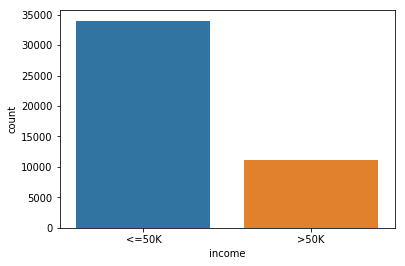

In [338]:
print(data.income.value_counts())
sns.countplot(x='income', data=data)
plt.show()

In [339]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
ohe=OneHotEncoder(categorical_features=[0])

In [340]:
cat=data.select_dtypes(include=['object']).columns

cat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [341]:
for c in cat:
    print(c)
    print(data[c].value_counts())

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64
occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sale

In [342]:
data=data.copy()
data.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [343]:
for x,col in enumerate(cat):
    print(col)
    data.iloc[:,x]=le.fit_transform(data.iloc[:,x])

workclass
education
marital-status
occupation
relationship
race
gender
native-country
income


In [344]:
data['native-country']=le.fit_transform(data['native-country'])
data['income']=le.fit_transform(data['income'])

In [345]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,1,6,1,6,3,2,1,0,0,40,38,0
1,21,2,11,8,0,4,0,4,1,0,0,50,38,0
2,11,1,7,11,0,10,0,4,1,0,0,40,38,1
3,27,2,15,9,0,6,0,2,1,7688,0,40,38,1
5,17,2,0,5,1,7,1,4,1,0,0,30,38,0
7,46,4,14,14,0,9,0,4,1,3103,0,32,38,1
8,7,2,15,9,1,7,4,4,0,0,0,40,38,0
9,38,2,5,3,0,2,0,4,1,0,0,10,38,0
10,48,2,11,8,0,6,0,4,1,6418,0,40,38,1
11,19,0,9,12,0,0,0,4,1,0,0,40,38,0


In [346]:
#data=ohe.fit_transform(data).toarray()

In [347]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,1,6,1,6,3,2,1,0,0,40,38,0
1,21,2,11,8,0,4,0,4,1,0,0,50,38,0
2,11,1,7,11,0,10,0,4,1,0,0,40,38,1
3,27,2,15,9,0,6,0,2,1,7688,0,40,38,1
5,17,2,0,5,1,7,1,4,1,0,0,30,38,0
7,46,4,14,14,0,9,0,4,1,3103,0,32,38,1
8,7,2,15,9,1,7,4,4,0,0,0,40,38,0
9,38,2,5,3,0,2,0,4,1,0,0,10,38,0
10,48,2,11,8,0,6,0,4,1,6418,0,40,38,1
11,19,0,9,12,0,0,0,4,1,0,0,40,38,0


In [348]:
#data[['marital-status','income']].groupby(['marital-status'],as_index=False).mean()

#for dataset in combine:
    #dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [349]:
# train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
# train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [350]:
# for dataset in combine:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

# train_df = train_df.drop(['FareBand'], axis=1)

In [351]:
X = data.iloc[:,:-1]
X = X.values
y = data['income'].values

In [352]:
X

array([[ 8,  2,  1, ...,  0, 40, 38],
       [21,  2, 11, ...,  0, 50, 38],
       [11,  1,  7, ...,  0, 40, 38],
       ...,
       [41,  2, 11, ...,  0, 40, 38],
       [ 5,  2, 11, ...,  0, 20, 38],
       [35,  3, 11, ...,  0, 40, 38]], dtype=int64)

In [353]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [356]:
algo = {'LR': LogisticRegression(), 
        'DT':DecisionTreeClassifier(), 
        'RFC':RandomForestClassifier(n_estimators=100), 
        'SVM':SVC(gamma=0.01),
        'KNN':KNeighborsClassifier(n_neighbors=10)
       }

for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))

Acurracy of LR is 84.06
Acurracy of DT is 81.40
Acurracy of RFC is 84.81
Acurracy of SVM is 85.32
Acurracy of KNN is 84.06


In [357]:
from xgboost import XGBClassifier

In [358]:
xgb=XGBClassifier()

In [359]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [360]:
print('Acurracy of ' + "xgb"+ ' is {0:.2f}'.format(xgb.score(X_test, y_test)*100))

Acurracy of xgb is 86.36


c:\users\varlock^_^\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
